#### ASSOCIATION RULE MINING : APRIORI ALGORITHM

<pre>The association analysis is a technique which attempts to find common patterns of items in 
large datasets. They analyse the dataset for strong relationship between the attribute values (i.e) correlation between different itemsets. </pre>

In [109]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Our Crime Data Set

<pre> The is a California district based crime dataset. The dataset is provided with 15 attributes. 
  Attribute "OFFENCE_CODE_GROUP" has nearly 64 unique offence types with unique offense code. 
 </pre>

In [110]:
df = pd.read_csv('crime1.csv')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192077603,1810,Drug Violation,DRUGS - SALE / MANUFACTURING,D4,167,2019,9,Wednesday,22,Part Two,HARRISON AVE,42.339542,-71.069409,"(42.33954199, -71.06940877)"
1,I192077600,3410,Towed,TOWED MOTOR VEHICLE,D4,626,2019,9,Wednesday,19,Part Three,JERSEY ST,42.342842,-71.096988,"(42.34284239, -71.09698826)"
2,I192077594,2629,Harassment,HARASSMENT,E18,490,2019,9,Wednesday,16,Part Two,AMERICAN LEGION HWY,42.275313,-71.115878,"(42.27531312, -71.11587798)"
3,I192077593,1402,Vandalism,VANDALISM,B3,469,2019,9,Wednesday,21,Part Two,ITASCA ST,42.278671,-71.096701,"(42.27867121, -71.09670100)"
4,I192077592,3018,Medical Assistance,SICK/INJURED/MEDICAL - POLICE,B2,282,2019,9,Wednesday,21,Part Three,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"


In [111]:
df.shape


(100015, 15)

In [112]:

df=df.replace('?',np.nan)
print('Number of instances=%d'%(df.shape[0]))
print('Number of attributes=%d'%(df.shape[1]))

print('Number pf missing values:')
for column in df.columns:
    print('\t%s: %d'%(column,df[column].isna().sum()))

Number of instances=100015
Number of attributes=15
Number pf missing values:
	INCIDENT_NUMBER: 0
	OFFENSE_CODE: 0
	OFFENSE_CODE_GROUP: 0
	OFFENSE_DESCRIPTION: 0
	DISTRICT: 542
	REPORTING_AREA: 0
	YEAR: 0
	MONTH: 0
	DAY_OF_WEEK: 0
	HOUR: 0
	UCR_PART: 15
	STREET: 1615
	Lat: 8069
	Long: 8069
	Location: 0


In [113]:
df = df.dropna()
df.shape

(91086, 15)

# Understanding our Data Set

## Number of Occurrences of a particular Offense

In [114]:
df['OFFENSE_CODE_GROUP'].value_counts()

Motor Vehicle Accident Response    9358
Medical Assistance                 8076
Larceny                            7839
Investigate Person                 5574
Other                              5132
                                   ... 
Arson                                16
Phone Call Complaints                13
Explosives                            6
Biological Threat                     1
Manslaughter                          1
Name: OFFENSE_CODE_GROUP, Length: 61, dtype: int64

## Top Offense 

In [115]:
df['OFFENSE_CODE_GROUP'].value_counts().idxmax()

'Motor Vehicle Accident Response'

In [116]:
df['OFFENSE_CODE_GROUP'].max()

'Warrant Arrests'

## Least Offense 

In [117]:
df['OFFENSE_CODE_GROUP'].value_counts().idxmin()

'Biological Threat'

In [118]:
df['OFFENSE_CODE_GROUP'].min()

'Aggravated Assault'

In [119]:
week_offense = df.groupby(['YEAR','OFFENSE_CODE_GROUP']).size().reset_index()
week_offense.max()

YEAR                             2019
OFFENSE_CODE_GROUP    Warrant Arrests
0                                6699
dtype: object

# Bar chart of Number of Offenses occurrences

<pre>The Bar chart describes the highest offense range and lowest offense range. </pre>

Text(0, 0.5, 'Frequency')

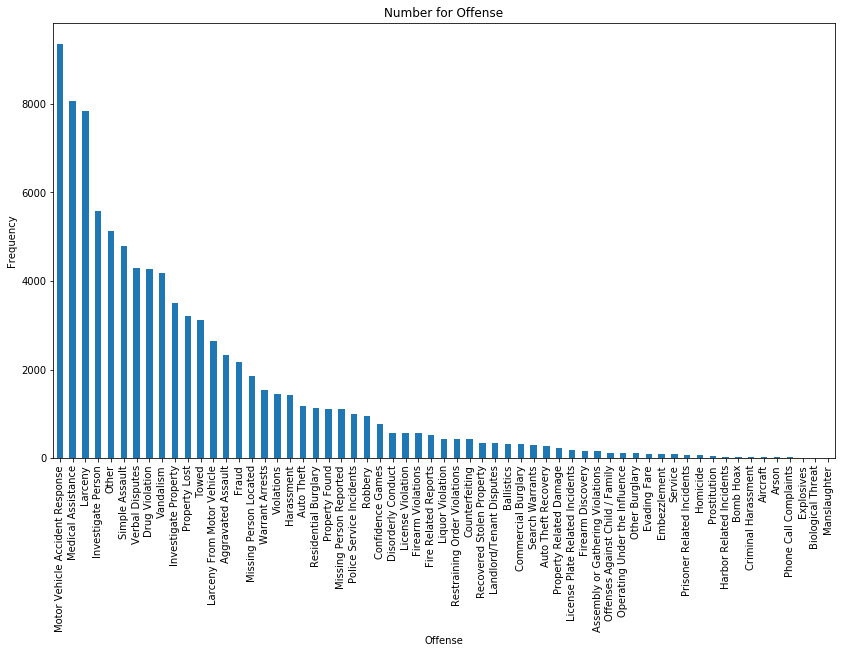

In [120]:
import matplotlib.pyplot as plt

ax = df['OFFENSE_CODE_GROUP'].value_counts().plot(kind='bar', figsize=(14,8),title="Number for Offense")
ax.set_xlabel("Offense")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

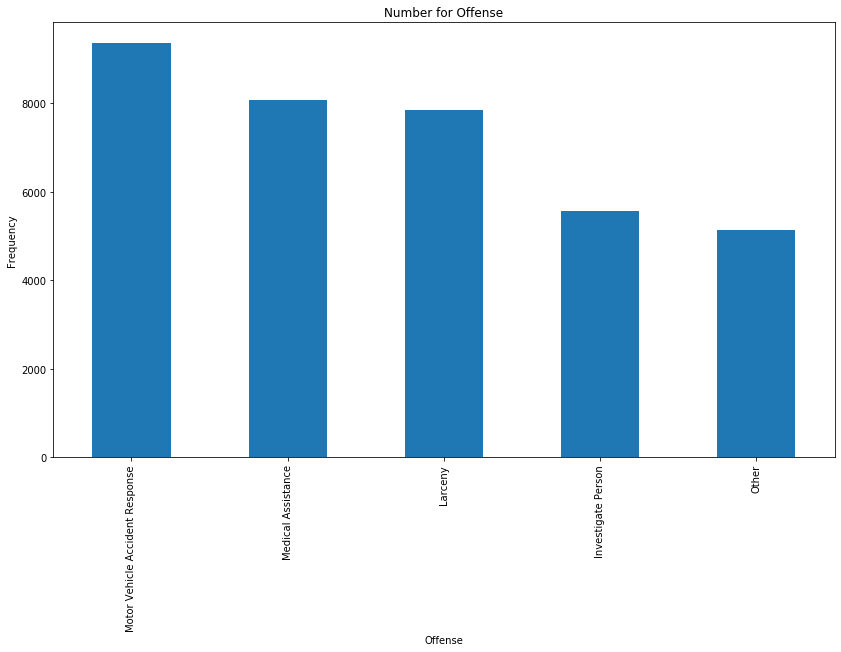

In [122]:
import matplotlib.pyplot as plt

ax = df['OFFENSE_CODE_GROUP'].value_counts().nlargest().plot(kind='bar', figsize=(14,8),title="Number for Offense")
ax.set_xlabel("Offense")
ax.set_ylabel("Frequency")

## One Hot Encoding using pd.crosstab
<pre> For this method we used only the colums OFFENSE_CODE_GROUP & DISTRICT and crosstabed these
two categories. To determine the amount of Offenses for a particular district </pre>

In [123]:
df1 = pd.crosstab(df.OFFENSE_CODE_GROUP,df.DISTRICT).astype('bool').astype('int')
df1.columns.name=None
df1.index.name=None

In [124]:
df1

,A1,A15,A7,B2,B3,C11,C6,D14,D4,E13,E18,E5
Aggravated Assault,1,1,1,1,1,1,1,1,1,1,1,1
Aircraft,0,0,1,0,0,0,0,0,0,0,0,0
Arson,0,0,0,1,1,1,1,1,1,1,1,0
Assembly or Gathering Violations,1,1,1,1,1,1,1,1,1,1,1,1
Auto Theft,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Towed,1,1,1,1,1,1,1,1,1,1,1,1
Vandalism,1,1,1,1,1,1,1,1,1,1,1,1
Verbal Disputes,1,1,1,1,1,1,1,1,1,1,1,1
Violations,1,1,1,1,1,1,1,1,1,1,1,1


IndexError: index 12 is out of bounds for axis 1 with size 12

#### creates 12 distrcts by 64 types of offense 

In [125]:
df1.shape

(61, 12)

## Additional Pre-Porcessing of Data
<pre> using the .drop('row') we are able to drop a few unecessary offenses that had low amounts of occurrences in our data</pre>

In [126]:
df1=df1.drop(['Embezzlement', 'Evading Fare','Ballistics','Arson','Bomb Hoax','Commercial Burglary','Confidence Games','Counterfeiting'])

In [ ]:
##              A1             A15              A7              B2 
##      "Downtown"   "Charlestown"   "East Boston"       "Roxbury" 
##              B3              C6             C11              D4 
##      "Mattapan"  "South Boston"    "Dorchester"     "South End" 
##             D14              E5             E13             E18 
##      "Brighton"  "West Roxbury" "Jamaica Plain"     "Hyde Park"

In [127]:
df1.head()

,A1,A15,A7,B2,B3,C11,C6,D14,D4,E13,E18,E5
Aggravated Assault,1,1,1,1,1,1,1,1,1,1,1,1
Aircraft,0,0,1,0,0,0,0,0,0,0,0,0
Assembly or Gathering Violations,1,1,1,1,1,1,1,1,1,1,1,1
Auto Theft,1,1,1,1,1,1,1,1,1,1,1,1
Auto Theft Recovery,1,1,1,1,1,1,1,1,1,1,1,1


## Applying the Apriori Algorithim 
<pre> Determined the frequent itemset by applying the algoritim and these are the results </pre>

In [128]:
freq_items = apriori(df1, min_support=0.2 , use_colnames=True)
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items


,support,itemsets,length
0,0.886792,(A1),1
1,0.849057,(A15),1
2,0.905660,(A7),1
3,0.905660,(B2),1
4,0.867925,(B3),1
...,...,...,...
4090,0.754717,"(A1, E18, E5, A7, D14, C6, E13, B3, A15, D4, C11)",11
4091,0.754717,"(A1, B2, E18, E5, D14, C6, E13, B3, A15, D4, C11)",11
4092,0.773585,"(A1, B2, E18, E5, A7, D14, C6, E13, B3, D4, C11)",11
4093,0.754717,"(B2, E18, E5, A7, D14, C6, E13, B3, A15, D4, C11)",11


In [140]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A1),(A15),0.886792,0.849057,0.811321,0.914894,1.077541,0.058384,1.773585
1,(A15),(A1),0.849057,0.886792,0.811321,0.955556,1.077541,0.058384,2.547170
2,(A7),(A1),0.905660,0.886792,0.830189,0.916667,1.033688,0.027056,1.358491
3,(A1),(A7),0.886792,0.905660,0.830189,0.936170,1.033688,0.027056,1.477987
4,(A1),(B2),0.886792,0.905660,0.849057,0.957447,1.057181,0.045924,2.216981
...,...,...,...,...,...,...,...,...,...
523245,(E13),"(A1, B2, E18, E5, A7, D14, C6, B3, A15, D4, C11)",0.867925,0.754717,0.754717,0.869565,1.152174,0.099680,1.880503
523246,(B3),"(A1, B2, E18, E5, A7, D14, C6, E13, A15, D4, C11)",0.867925,0.754717,0.754717,0.869565,1.152174,0.099680,1.880503
523247,(A15),"(A1, B2, E18, E5, A7, D14, C6, E13, B3, D4, C11)",0.849057,0.773585,0.754717,0.888889,1.149051,0.097900,2.037736
523248,(D4),"(A1, B2, E18, E5, A7, D14, C6, E13, B3, A15, C11)",0.924528,0.754717,0.754717,0.816327,1.081633,0.056960,1.335430


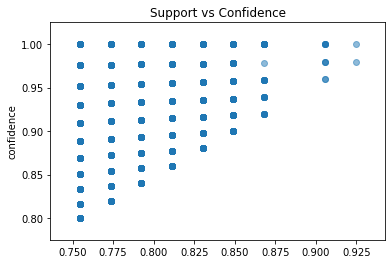

In [132]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [51]:
rules = association_rules(freq_items, metric="lift", min_threshold=0.8)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A1),(A15),0.886792,0.849057,0.811321,0.914894,1.077541,0.058384,1.773585
1,(A15),(A1),0.849057,0.886792,0.811321,0.955556,1.077541,0.058384,2.547170
2,(A7),(A1),0.905660,0.886792,0.830189,0.916667,1.033688,0.027056,1.358491
3,(A1),(A7),0.886792,0.905660,0.830189,0.936170,1.033688,0.027056,1.477987
4,(A1),(B2),0.886792,0.905660,0.849057,0.957447,1.057181,0.045924,2.216981


In [52]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(A1),(A15),0.886792,0.849057,0.811321,0.914894,1.077541,0.058384,1.773585,1
1,(A15),(A1),0.849057,0.886792,0.811321,0.955556,1.077541,0.058384,2.547170,1
2,(A7),(A1),0.905660,0.886792,0.830189,0.916667,1.033688,0.027056,1.358491,1
3,(A1),(A7),0.886792,0.905660,0.830189,0.936170,1.033688,0.027056,1.477987,1
4,(A1),(B2),0.886792,0.905660,0.849057,0.957447,1.057181,0.045924,2.216981,1
...,...,...,...,...,...,...,...,...,...,...
523245,(E13),"(A1, B2, E18, E5, A7, D14, C6, B3, A15, D4, C11)",0.867925,0.754717,0.754717,0.869565,1.152174,0.099680,1.880503,1
523246,(B3),"(A1, B2, E18, E5, A7, D14, C6, E13, A15, D4, C11)",0.867925,0.754717,0.754717,0.869565,1.152174,0.099680,1.880503,1
523247,(A15),"(A1, B2, E18, E5, A7, D14, C6, E13, B3, D4, C11)",0.849057,0.773585,0.754717,0.888889,1.149051,0.097900,2.037736,1
523248,(D4),"(A1, B2, E18, E5, A7, D14, C6, E13, B3, A15, C11)",0.924528,0.754717,0.754717,0.816327,1.081633,0.056960,1.335430,1


In [191]:
rules[(rules['antecedents'] == {'B2', 'C11'})  &
       (rules['confidence'] >= 0.9) & (rules['support']>=0.9) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1004,"(B2, C11)",(D4),0.90566,0.924528,0.90566,1.0,1.081633,0.068352,inf


In [200]:
rules[(rules['antecedents'] == {'D4', 'C11'})  &
       (rules['confidence'] >=0.9) & (rules['support']>=0.9) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1003,"(D4, C11)",(B2),0.924528,0.90566,0.90566,0.979592,1.081633,0.068352,4.622642


In [201]:
rules[(rules['antecedents'] == {'D4', 'B2'})  &
       (rules['confidence'] >=0.9) & (rules['support']>=0.9) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1002,"(D4, B2)",(C11),0.90566,0.943396,0.90566,1.0,1.06,0.051264,inf


In [202]:
ass_rules = rules[(rules['support']>=0.9) &
       (rules['confidence'] >= 0.9) ]

In [203]:
ass_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,(B2),(C11),0.905660,0.943396,0.905660,1.000000,1.060000,0.051264,inf
63,(C11),(B2),0.943396,0.905660,0.905660,0.960000,1.060000,0.051264,2.358491
68,(D4),(B2),0.924528,0.905660,0.905660,0.979592,1.081633,0.068352,4.622642
69,(B2),(D4),0.905660,0.924528,0.905660,1.000000,1.081633,0.068352,inf
94,(D4),(C11),0.924528,0.943396,0.924528,1.000000,1.060000,0.052332,inf
95,(C11),(D4),0.943396,0.924528,0.924528,0.980000,1.060000,0.052332,3.773585
1002,"(D4, B2)",(C11),0.905660,0.943396,0.905660,1.000000,1.060000,0.051264,inf
1003,"(D4, C11)",(B2),0.924528,0.905660,0.905660,0.979592,1.081633,0.068352,4.622642
1004,"(B2, C11)",(D4),0.905660,0.924528,0.905660,1.000000,1.081633,0.068352,inf
1005,(D4),"(B2, C11)",0.924528,0.905660,0.905660,0.979592,1.081633,0.068352,4.622642


In [204]:
print(len(ass_rules))

12


In [205]:
ass_rules = rules[(rules['support']<=0.8) &
       (rules['confidence'] <= 0.8) ]

In [206]:
ass_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3886,(C11),"(A7, B3, A15)",0.943396,0.754717,0.754717,0.8,1.06,0.04272,1.226415
3998,(C11),"(A7, D14, A15)",0.943396,0.754717,0.754717,0.8,1.06,0.04272,1.226415
4026,(C11),"(A7, A15, E13)",0.943396,0.754717,0.754717,0.8,1.06,0.04272,1.226415
4040,(C11),"(A7, E18, A15)",0.943396,0.754717,0.754717,0.8,1.06,0.04272,1.226415
4054,(C11),"(A7, E5, A15)",0.943396,0.754717,0.754717,0.8,1.06,0.04272,1.226415
...,...,...,...,...,...,...,...,...,...
510971,(C11),"(A1, B2, E18, E5, A7, D14, C6, E13, A15, D4)",0.943396,0.754717,0.754717,0.8,1.06,0.04272,1.226415
513017,(C11),"(A1, E18, E5, A7, D14, C6, E13, B3, A15, D4)",0.943396,0.754717,0.754717,0.8,1.06,0.04272,1.226415
515063,(C11),"(A1, B2, E18, E5, D14, C6, E13, B3, A15, D4)",0.943396,0.754717,0.754717,0.8,1.06,0.04272,1.226415
519155,(C11),"(B2, E18, E5, A7, D14, C6, E13, B3, A15, D4)",0.943396,0.754717,0.754717,0.8,1.06,0.04272,1.226415


## Visualizing Result 

#### Splitting frequent_item sets "length" between less than 6 and greater than 6

In [207]:
val=freq_items[ (freq_items['length']<=6) &
                   (freq_items['support'] < 0.8) ]
val


,support,itemsets,length
21,0.792453,"(E18, A1)",2
23,0.792453,"(A7, A15)",2
28,0.792453,"(D14, A15)",2
30,0.792453,"(E13, A15)",2
31,0.792453,"(E18, A15)",2
...,...,...,...
2504,0.773585,"(E18, E5, D14, C6, D4, C11)",6
2505,0.773585,"(E18, E5, D14, C6, E13, C11)",6
2506,0.773585,"(E18, E5, C6, E13, D4, C11)",6
2507,0.773585,"(E18, E5, D14, E13, D4, C11)",6


In [208]:
val1=freq_items[ (freq_items['length']>6) &
                   (freq_items['support'] <= 0.8) ]
val1


,support,itemsets,length
2509,0.754717,"(A1, B2, A7, C6, B3, A15, C11)",7
2510,0.754717,"(A1, B2, A7, D14, B3, A15, C11)",7
2511,0.754717,"(A1, B2, A7, B3, A15, D4, C11)",7
2512,0.754717,"(A1, B2, A7, E13, B3, A15, C11)",7
2513,0.754717,"(A1, B2, E18, A7, B3, A15, C11)",7
...,...,...,...
4090,0.754717,"(A1, E18, E5, A7, D14, C6, E13, B3, A15, D4, C11)",11
4091,0.754717,"(A1, B2, E18, E5, D14, C6, E13, B3, A15, D4, C11)",11
4092,0.773585,"(A1, B2, E18, E5, A7, D14, C6, E13, B3, D4, C11)",11
4093,0.754717,"(B2, E18, E5, A7, D14, C6, E13, B3, A15, D4, C11)",11


In [209]:
df.Lat.replace(-1, None, inplace=True)
df.Long.replace(-1, None, inplace=True)

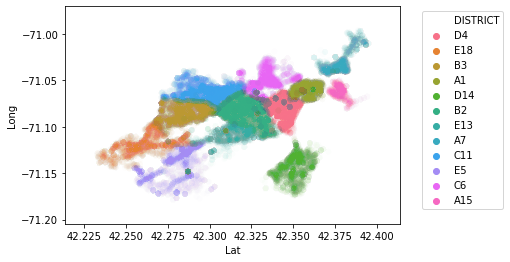

In [211]:
sns.scatterplot(x='Lat',
               y='Long',
                hue='DISTRICT',
                alpha=0.01,
               data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)